In [2]:
!pip install contractions

In [11]:
!pip install tqdm

In [12]:
!pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import contractions
from textblob import TextBlob
import nltk
import nltk
from nltk import *
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv('ReviewData.csv')
df = df.iloc[:,1:]
df

,reviews
0,"If to say in a nutshell, product is MORE THAN EXCELLENT.My experience say that many global brands maintains focus on their product but the box/packaging in which it is being rolled out from the ma..."
1,"Ordered this product on 8th of July and I received it on 9th. Here are the pros and cons-Pros:1. Screen clarity is awesome.2. Superb call quality, Camera and Video Camera.3. Good Battery backup (F..."
2,"Pros : touch is great, phone response time is superb due to underlying OS.IPhone is much secure as compared to other phones as it will not allow unwanted malware or application getting installed a..."
3,Can be A very good gifts to older peoples.... because They don't need much memory space..... Phone is very fast... Thanks to apple's high optimized OS..... look and feel is very rich..... Camera a...
4,"Buy, if your Budget is below 13K.I am using the IPhone 4s for more than 10 months now, & i feel that if you are on tight budget & want to experience the IOS, then go for IPhone4s. (Note: If you co..."
...,...
13666,The camera has good quality! I love that the betery last so long and I love that it runs fast and it look so cute !
13667,I love this phone!!! The only thing I hate about apple is all the good apps you have to buy...
13668,"I used to have this phone until i gave it to a company to fix the home button cause it got stuck a lot and they ended up breaking the motherboard and it was not backed up to icloud. so, iphone dow..."
13669,I love this phone I loved the style of it never have had any problems in fact I'm using it right now. :)


In [85]:
df.shape

(13671, 1)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13671 entries, 0 to 13670
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  13670 non-null  object
dtypes: object(1)
memory usage: 106.9+ KB


In [89]:
df.isnull().sum()

reviews    1
dtype: int64

In [90]:
df[df['reviews'].isna()]

,reviews
767,NaN


In [91]:
df.dropna(inplace = True, axis = 0)

In [92]:
df.isnull().sum()

reviews    0
dtype: int64

In [93]:
df.shape

(13670, 1)

In [94]:
dff = df

# 1. Data Preprocessing

1. Expanding Contractions
2. Make text all lower case
3. Remove punctuation
4. Remove numerical values
5. Remove common non-sensical text (/n)
6. Tokenize text
7. Remove stop words

In [8]:
!pip install text_hammer

  Using cached beautifulsoup4-4.9.1-py3-none-any.whl (115 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.9.0
    Uninstalling pydantic-1.9.0:
      Successfully uninstalled pydantic-1.9.0
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.1
    Uninstalling beautifulsoup4-4.11.1:
      Successfully uninstalled beautifulsoup4-4.11.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.2.0 requires spacy<3.3.0,>=3.2.0, but you have spacy 3.3.0 which is incompatible.


## 1.1 Using Text Hammer

In [95]:
import text_hammer as th

In [96]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name 
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: re.sub('\w*\d\w*','', x)) # remove numbers
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
#     df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))
  
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    df[column] = df[column].progress_apply(lambda x: re.sub("(.)\\1{2,}", "\\1", x))
    return(df)

In [97]:
cleaned_df = text_preprocessing(df, "reviews")
cleaned_df

  0%|          | 0/13670 [00:00<?, ?it/s]

  0%|          | 0/13670 [00:00<?, ?it/s]

  0%|          | 0/13670 [00:00<?, ?it/s]

  0%|          | 0/13670 [00:00<?, ?it/s]

  0%|          | 0/13670 [00:00<?, ?it/s]

  0%|          | 0/13670 [00:00<?, ?it/s]

  0%|          | 0/13670 [00:00<?, ?it/s]

  0%|          | 0/13670 [00:00<?, ?it/s]

  0%|          | 0/13670 [00:00<?, ?it/s]

  0%|          | 0/13670 [00:00<?, ?it/s]

,reviews
0,nutshell product excellentmy experience global brand maintain focus product boxpackaging roll manufacturing unit similar gauge quality standard philosophy making but experience regard apple iphone...
1,order product july receive pro conspro screen clarity awesome superb quality camera video camera good battery backup full charge come till nightcon phone start heating minute browse chat internet ...
2,pro touch great phone response time superb underlie osiphone secure compare phone allow unwanted malware application getting instal away databattery backup goodcon issue face iphone call say phone...
3,good gift old people need memory space phone fast thank apple high optimize os look feel rich camera video record superb vlc player application play kind video simply love it
4,buy budget I iphone month now feel tight budget want experience io note spend little iphone pro great io superb display easily hand fit great camera hardware quality notch apple sale servicecon io...
...,...
13666,camera good quality love betery long love run fast look cute
13667,love phone thing hate apple good application buy
13668,phone give company fix home button cause get stick lot end break motherboard back icloud so iphone down cry that great starter phone kid deserve it
13669,love phone love style problem fact right now


In [98]:
df = cleaned_df.drop_duplicates('reviews')

In [99]:
df.shape

(12369, 1)

In [100]:
df

,reviews
0,nutshell product excellentmy experience global brand maintain focus product boxpackaging roll manufacturing unit similar gauge quality standard philosophy making but experience regard apple iphone...
1,order product july receive pro conspro screen clarity awesome superb quality camera video camera good battery backup full charge come till nightcon phone start heating minute browse chat internet ...
2,pro touch great phone response time superb underlie osiphone secure compare phone allow unwanted malware application getting instal away databattery backup goodcon issue face iphone call say phone...
3,good gift old people need memory space phone fast thank apple high optimize os look feel rich camera video record superb vlc player application play kind video simply love it
4,buy budget I iphone month now feel tight budget want experience io note spend little iphone pro great io superb display easily hand fit great camera hardware quality notch apple sale servicecon io...
...,...
13666,camera good quality love betery long love run fast look cute
13667,love phone thing hate apple good application buy
13668,phone give company fix home button cause get stick lot end break motherboard back icloud so iphone down cry that great starter phone kid deserve it
13669,love phone love style problem fact right now


In [101]:
from nltk.stem import PorterStemmer

In [102]:
st = PorterStemmer()
df['reviews'] = df['reviews'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [103]:
df

,reviews
0,nutshel product excellentmi experi global brand maintain focu product boxpackag roll manufactur unit similar gaug qualiti standard philosophi make but experi regard appl iphon differ appl qualiti ...
1,order product juli receiv pro conspro screen clariti awesom superb qualiti camera video camera good batteri backup full charg come till nightcon phone start heat minut brows chat internet usag do ...
2,pro touch great phone respons time superb underli osiphon secur compar phone allow unwant malwar applic get instal away databatteri backup goodcon issu face iphon call say phone switch off know te...
3,good gift old peopl need memori space phone fast thank appl high optim os look feel rich camera video record superb vlc player applic play kind video simpli love it
4,buy budget i iphon month now feel tight budget want experi io note spend littl iphon pro great io superb display easili hand fit great camera hardwar qualiti notch appl sale servicecon io slow han...
...,...
13666,camera good qualiti love beteri long love run fast look cute
13667,love phone thing hate appl good applic buy
13668,phone give compani fix home button caus get stick lot end break motherboard back icloud so iphon down cri that great starter phone kid deserv it
13669,love phone love style problem fact right now


# 2. EDA

#### Here we are adding the length of the review and the word count of each review.

In [104]:
df['review_len'] = df['reviews'].astype(str).apply(len)
df['word_count'] = df['reviews'].apply(lambda x: len(str(x).split()))

#### Polarity shows the sentiment of a piece of text.  
#### It counts the negative and positive words and determines the polarity.  
#### The value ranges from -1 to 1 where -1 represents the negative sentiment, 0 represents neutral and 1 represent positive sentiment.

In [105]:
pd.options.mode.chained_assignment = None

In [106]:
df['polarity'] = df['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

,reviews,review_len,word_count,polarity
0,nutshel product excellentmi experi global brand maintain focu product boxpackag roll manufactur unit similar gaug qualiti standard philosophi make but experi regard appl iphon differ appl qualiti ...,1204,179,0.172645
1,order product juli receiv pro conspro screen clariti awesom superb qualiti camera video camera good batteri backup full charg come till nightcon phone start heat minut brows chat internet usag do ...,291,45,0.637500
2,pro touch great phone respons time superb underli osiphon secur compar phone allow unwant malwar applic get instal away databatteri backup goodcon issu face iphon call say phone switch off know te...,395,63,0.430000
3,good gift old peopl need memori space phone fast thank appl high optim os look feel rich camera video record superb vlc player applic play kind video simpli love it,164,30,0.454375
4,buy budget i iphon month now feel tight budget want experi io note spend littl iphon pro great io superb display easili hand fit great camera hardwar qualiti notch appl sale servicecon io slow han...,567,96,0.191071


In [107]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label>=0:
        return "Positive"

In [108]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [109]:
df['sentiment'].value_counts()

Positive    10933
Negative     1436
Name: sentiment, dtype: int64

## 2.1. Distributions

Distribution of the word_count, review_len, and polarity

array([[<AxesSubplot:title={'center':'review_len'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'polarity'}>, <AxesSubplot:>]],
      dtype=object)

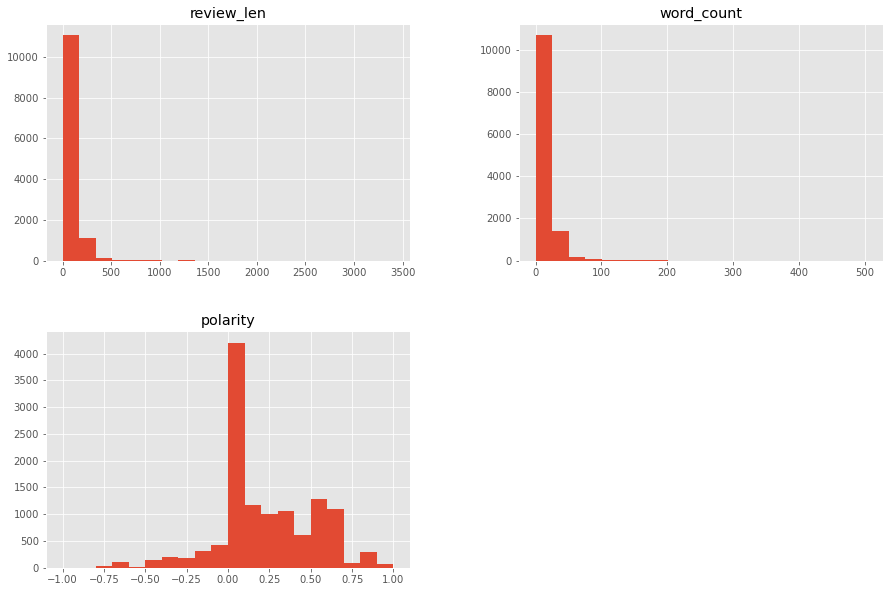

In [110]:
df[["review_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

The distribution of Review length and the word counts are similar as expected.

The majority population lies in the lower range.

Heavily right-skewed distribution there.

Polarity is almost normal.

The majority polarity is more than zero.

That means maximum reviews have a positive sentiment.

#### Polarity vs Review Length

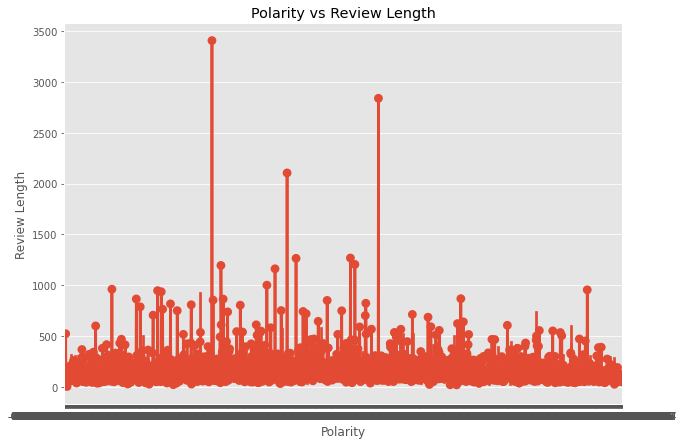

In [111]:
plt.figure(figsize = (10,7))
sns.pointplot(x = "polarity", y = "review_len", data = df)
plt.xlabel("Polarity")
plt.ylabel("Review Length")
plt.title("Polarity vs Review Length")
plt.show()

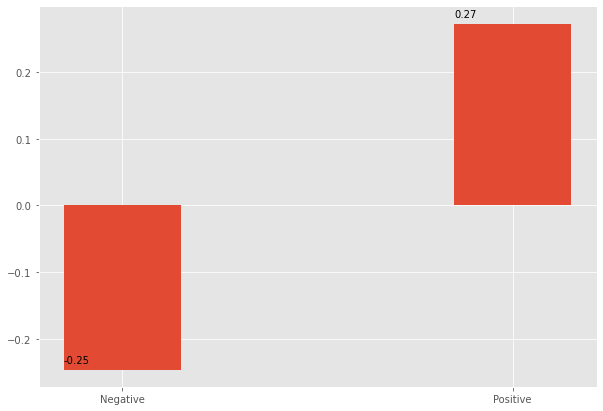

In [112]:
mean_pol = df.groupby('sentiment')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig , ax = plt.subplots(figsize = (10,7))
plt.bar(mean_pol.index, mean_pol.mean_polarity, width =0.3)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))


<AxesSubplot:xlabel='sentiment', ylabel='count'>

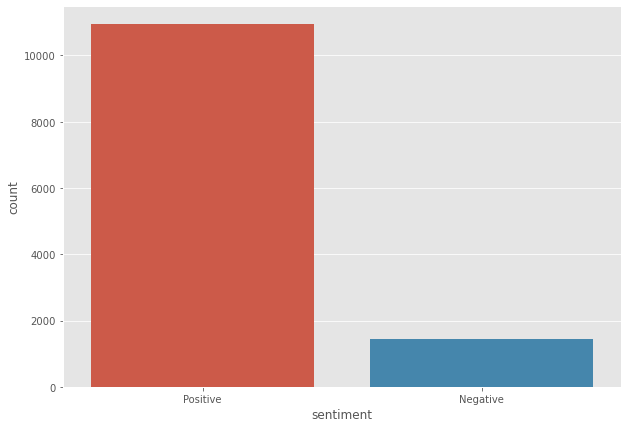

In [113]:
fig = plt.figure(figsize=(10,7))
sns.countplot(x='sentiment', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

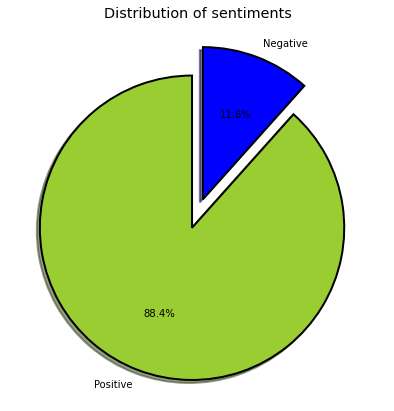

In [114]:
fig = plt.figure(figsize=(10,7))
colors = ("yellowgreen", "blue")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

## 2.2 WordCloud

### Positive

In [115]:
pos_rev = df[df.sentiment == 'Positive']
pos_rev = pos_rev.sort_values(['polarity'], ascending= False)
pos_rev.head()

,reviews,review_len,word_count,polarity,sentiment
1962,ver superb servic flipkartread,30,4,1.0,Positive
12152,iphon coupl year work batteri life frustrat sometim phone get job do size shape phone perfect,93,16,1.0,Positive
8446,simpli perfect expect,21,3,1.0,Positive
8448,simpl superb mobil phone,24,4,1.0,Positive
7276,perfect person phone compact devic lover,40,6,1.0,Positive


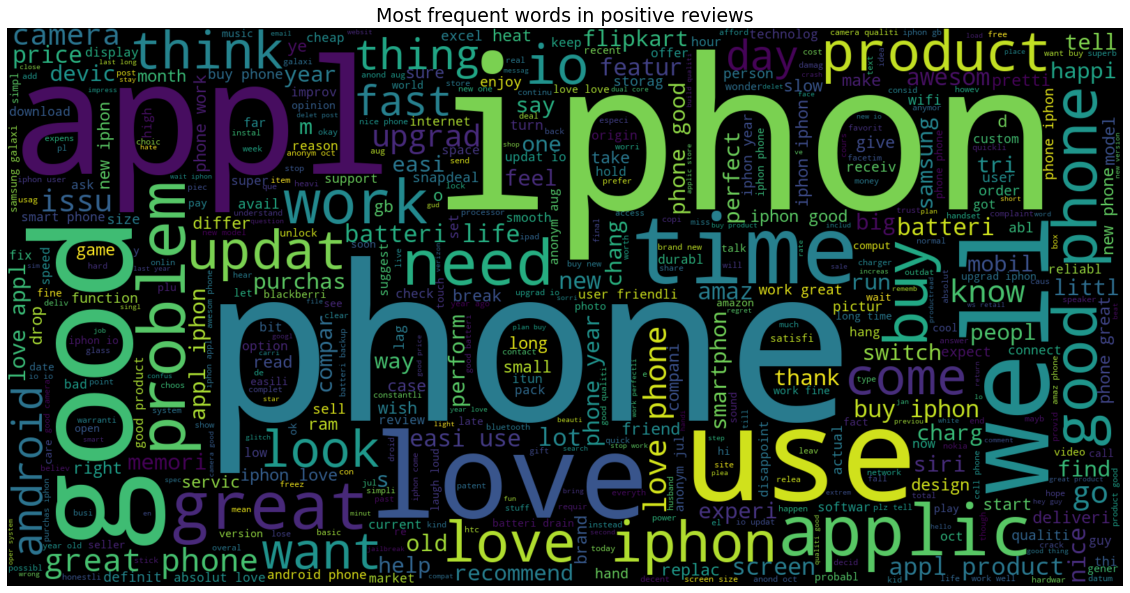

In [116]:
text = ' '.join([word for word in pos_rev['reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()


### Negative

In [117]:
neg_rev = df[df.sentiment == 'Negative']
neg_rev = neg_rev.sort_values(['polarity'], ascending= False)
neg_rev.head()

,reviews,review_len,word_count,polarity,sentiment
5306,ali aug iphon that s awesom awesom iphon without youtub client googl map which backbon appl success past now googl long go support appi compani smartphonetablet laptop futur contract period expir,195,31,-4.625929e-18,Negative
6079,anond oct appl reason applic appstor well qualiti accord youi beca want free useless applic say i m iphon until din purchas singl applic everth it say free adroid lover know degrad applic store an...,407,72,-6.167906e-18,Negative
4143,updat wifi batteri thing ok apart camera work anytim launch home screen show blank screen work perfectli launch game center viber whatsapp have problem solv it advis,165,27,-6.938894e-18,Negative
9067,last long iphon famili while absolut it get slow crack nice use upgrad make look small unbear,93,17,-1.110223e-17,Negative
12205,love iphon old version slow complaint phone power button break randomli,71,11,-1.387779e-17,Negative


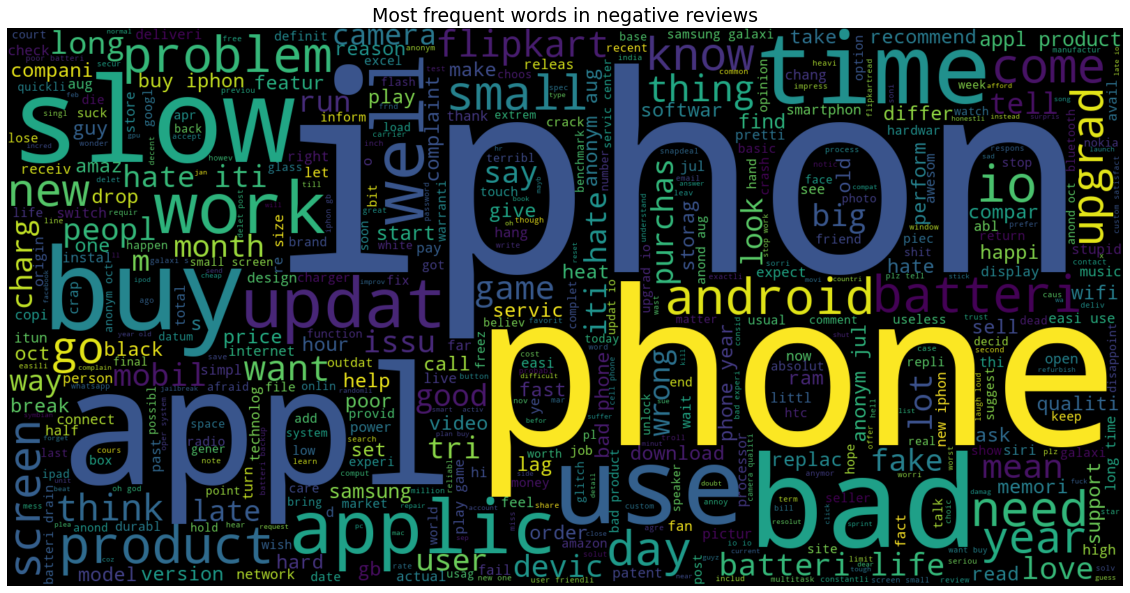

In [118]:
text = ' '.join([word for word in neg_rev['reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize=19)
plt.show()

# 3. Feature Generation

## 3.1 Frequency Charts(BoW)

This is common practice in text data analysis to make charts of the frequency of words. 

That gives a good idea about what people are talking about most in this text. 

First, find the frequency of each word in the review column of the dataset. 

Then plot the top 20 words based on the frequency.

In [119]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['reviews'], 20)
df1 = pd.DataFrame(common_words, columns = ['Review', 'count'])
df1.head()

,Review,count
0,phone,7884
1,iphon,7121
2,appl,3184
3,good,3167
4,love,2695


Here is the bar plot of the frequency of the top 20 words:

<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

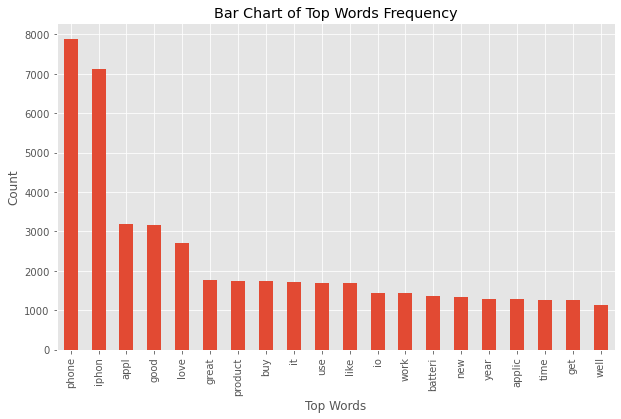

In [120]:
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

#### The following plot shows the topmost frequent <b>bigrams:</b>

In [121]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(df['reviews'], 30)
df2 = pd.DataFrame(common_words2, columns=['Review', "Count"])
df2.head()

,Review,Count
0,good phone,559
1,love iphon,528
2,batteri life,426
3,appl product,418
4,great phone,404


<AxesSubplot:title={'center':'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

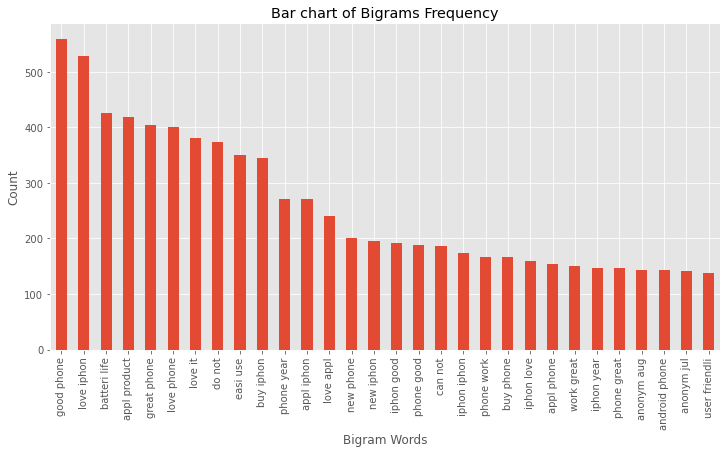

In [122]:
df2.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)

#### The following plot shows the topmost frequent trigrams:

In [123]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(df['reviews'], 30)
df3 = pd.DataFrame(common_words3, columns = ['Review' , 'Count'])
df3.head()

,Review,Count
0,love appl product,110
1,iphon good phone,62
2,hate iti hate,57
3,iti hate iti,56
4,batteri drain fast,43


<AxesSubplot:title={'center':'Bar chart of Trigrams Frequency'}, xlabel='Trigram Words', ylabel='Count'>

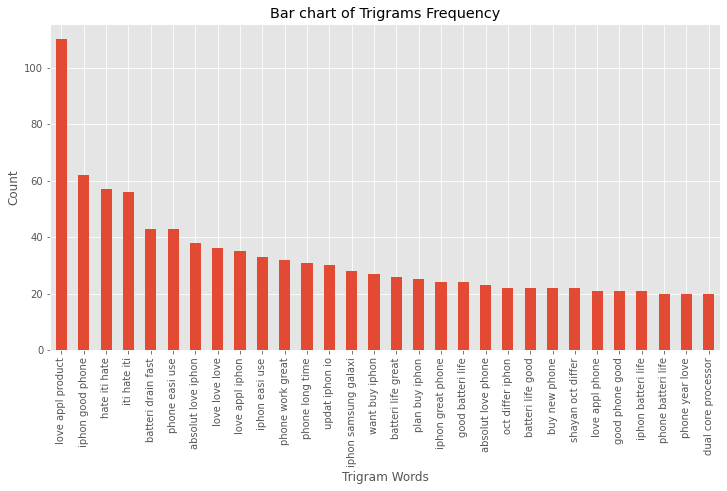

In [124]:
df3.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency"
)

## 3.2 Part-of -Speech Tagging

<AxesSubplot:title={'center':'Bar Chart of the Frequency of the Parts of Speech'}, xlabel='Part Of Speech', ylabel='Frequency'>

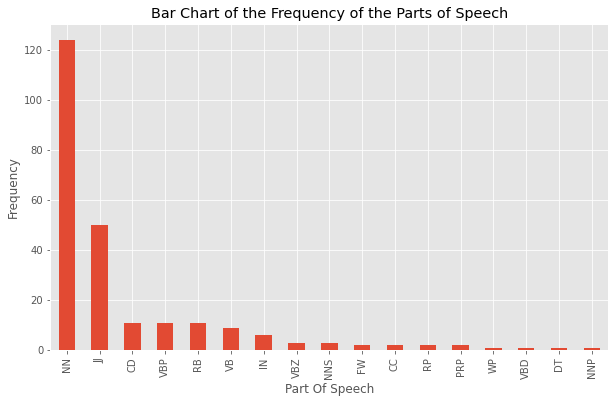

In [125]:
blob = TextBlob(str(df['reviews']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df = pos_df.pos.value_counts()[:30]
pos_df.plot(kind='bar',
            xlabel = "Part Of Speech",
           ylabel = "Frequency",
           title = "Bar Chart of the Frequency of the Parts of Speech",
           figsize=(10, 6))

In [126]:
pos_df

NN     124
JJ      50
CD      11
VBP     11
RB      11
VB       9
IN       6
VBZ      3
NNS      3
FW       2
CC       2
RP       2
PRP      2
WP       1
VBD      1
DT       1
NNP      1
Name: pos, dtype: int64

In [127]:
df

,reviews,review_len,word_count,polarity,sentiment
0,nutshel product excellentmi experi global brand maintain focu product boxpackag roll manufactur unit similar gaug qualiti standard philosophi make but experi regard appl iphon differ appl qualiti ...,1204,179,0.172645,Positive
1,order product juli receiv pro conspro screen clariti awesom superb qualiti camera video camera good batteri backup full charg come till nightcon phone start heat minut brows chat internet usag do ...,291,45,0.637500,Positive
2,pro touch great phone respons time superb underli osiphon secur compar phone allow unwant malwar applic get instal away databatteri backup goodcon issu face iphon call say phone switch off know te...,395,63,0.430000,Positive
3,good gift old peopl need memori space phone fast thank appl high optim os look feel rich camera video record superb vlc player applic play kind video simpli love it,164,30,0.454375,Positive
4,buy budget i iphon month now feel tight budget want experi io note spend littl iphon pro great io superb display easili hand fit great camera hardwar qualiti notch appl sale servicecon io slow han...,567,96,0.191071,Positive
...,...,...,...,...,...
13666,camera good qualiti love beteri long love run fast look cute,60,11,0.391667,Positive
13667,love phone thing hate appl good applic buy,42,8,0.133333,Positive
13668,phone give compani fix home button caus get stick lot end break motherboard back icloud so iphon down cri that great starter phone kid deserv it,144,26,0.214815,Positive
13669,love phone love style problem fact right now,44,8,0.428571,Positive


In [128]:
df.to_csv("cleaned_data.csv")

# 4. Building Model

In [42]:
df = pd.read_csv('cleaned_data.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,reviews,review_len,word_count,polarity,sentiment
0,nutshel product excellentmi experi global brand maintain focu product boxpackag roll manufactur unit similar gaug qualiti standard philosophi make but experi regard appl iphon differ appl qualiti ...,1204,179,0.172645,Positive
1,order product juli receiv pro conspro screen clariti awesom superb qualiti camera video camera good batteri backup full charg come till nightcon phone start heat minut brows chat internet usag do ...,291,45,0.637500,Positive
2,pro touch great phone respons time superb underli osiphon secur compar phone allow unwant malwar applic get instal away databatteri backup goodcon issu face iphon call say phone switch off know te...,395,63,0.430000,Positive
3,good gift old peopl need memori space phone fast thank appl high optim os look feel rich camera video record superb vlc player applic play kind video simpli love it,164,30,0.454375,Positive
4,buy budget i iphon month now feel tight budget want experi io note spend littl iphon pro great io superb display easili hand fit great camera hardwar qualiti notch appl sale servicecon io slow han...,567,96,0.191071,Positive


In [43]:
df['sentiment'] = df['sentiment'].map({'Positive':1, 'Negative': 0})
df

,reviews,review_len,word_count,polarity,sentiment
0,nutshel product excellentmi experi global brand maintain focu product boxpackag roll manufactur unit similar gaug qualiti standard philosophi make but experi regard appl iphon differ appl qualiti ...,1204,179,0.172645,1
1,order product juli receiv pro conspro screen clariti awesom superb qualiti camera video camera good batteri backup full charg come till nightcon phone start heat minut brows chat internet usag do ...,291,45,0.637500,1
2,pro touch great phone respons time superb underli osiphon secur compar phone allow unwant malwar applic get instal away databatteri backup goodcon issu face iphon call say phone switch off know te...,395,63,0.430000,1
3,good gift old peopl need memori space phone fast thank appl high optim os look feel rich camera video record superb vlc player applic play kind video simpli love it,164,30,0.454375,1
4,buy budget i iphon month now feel tight budget want experi io note spend littl iphon pro great io superb display easili hand fit great camera hardwar qualiti notch appl sale servicecon io slow han...,567,96,0.191071,1
...,...,...,...,...,...
12364,camera good qualiti love beteri long love run fast look cute,60,11,0.391667,1
12365,love phone thing hate appl good applic buy,42,8,0.133333,1
12366,phone give compani fix home button caus get stick lot end break motherboard back icloud so iphon down cri that great starter phone kid deserv it,144,26,0.214815,1
12367,love phone love style problem fact right now,44,8,0.428571,1


In [44]:
X = df['reviews'].values.astype(str)
y = df['sentiment']

In [45]:
from sklearn.model_selection import train_test_split

In [71]:
X.dtype

dtype('<U3406')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print('Number of tweets in the total set : {}'.format(len(X)))
print('Number of tweets in the training set : {}'.format(len(X_train)))
print('Number of tweets in the testing set : {}'.format(len(X_test)))

Number of tweets in the total set : 12369
Number of tweets in the training set : 9895
Number of tweets in the testing set : 2474


# 4.1 Using CountVectorizer

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cvx_train = cv.fit_transform(X_train).toarray()
cvx_test = cv.transform(X_test).toarray()

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [49]:
def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

## A]. Logistic Regression Model

In [50]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(cvx_train,y_train)
print("lr accuracy: ",lr.score(cvx_test,y_test))
y_test_pred_lr = lr.predict(cvx_test)
print_score(y_test, y_test_pred_lr, train=False)
print("lr train accuracy: ",lr.score(cvx_train,y_train))

lr accuracy:  0.9474535165723524
Test Result:
Accuracy Score: 94.75%
_______________________________________________
Classification Report:
                    0            1  accuracy    macro avg  weighted avg
precision    0.855204     0.956502  0.947454     0.905853      0.944751
recall       0.658537     0.985368  0.947454     0.821952      0.947454
f1-score     0.744094     0.970721  0.947454     0.857408      0.944431
support    287.000000  2187.000000  0.947454  2474.000000   2474.000000
_______________________________________________
Confusion Matrix: 
 [[ 189   98]
 [  32 2155]]

lr train accuracy:  0.9871652349671551


In [51]:
y_train_pred_lr = lr.predict(cvx_train)
y_train_pred_lr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## B]. XGBoost Classifier

In [52]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
# xgb_clf.fit(tfX_train, y_train, eval_metric='aucpr')
xgb_clf.fit(cvx_train, y_train, eval_metric='logloss')

y_test_pred_xgb = xgb_clf.predict(cvx_test)
print_score(y_test, y_test_pred_xgb, train=False)
print("xgb_clf train accuracy: ",xgb_clf.score(cvx_train,y_train))

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Test Result:
Accuracy Score: 95.68%
_______________________________________________
Classification Report:
                    0            1  accuracy    macro avg  weighted avg
precision    0.875000     0.965533   0.95675     0.920266      0.955030
recall       0.731707     0.986283   0.95675     0.858995      0.956750
f1-score     0.796964     0.975797   0.95675     0.886381      0.955052
support    287.000000  2187.000000   0.95675  2474.000000   2474.000000
_______________________________________________
Confusion Matrix: 
 [[ 210   77]
 [  30 2157]]

xgb_clf train accuracy:  0.9794845881758464


In [53]:
print("lr accuracy: ",xgb_clf.score(cvx_test,y_test))

lr accuracy:  0.9567502021018593


In [54]:
y_train_pred_xgb = xgb_clf.predict(cvx_train)
y_train_pred_xgb

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# 4.2 Using TFidf Vectorizer

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization=TfidfVectorizer()
tfX_train=vectorization.fit_transform(X_train)
tfX_test=vectorization.transform(X_test)

## A]. Logistic Regression Model

In [56]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(tfX_train,y_train)
print("lr accuracy: ",lr.score(tfX_test,y_test))
y_test_pred_tflr = lr.predict(tfX_test)
print_score(y_test, y_test_pred_tflr, train=False)
print("lr train accuracy: ",lr.score(tfX_train,y_train))

lr accuracy:  0.9135004042037187
Test Result:
Accuracy Score: 91.35%
_______________________________________________
Classification Report:
                    0            1  accuracy    macro avg  weighted avg
precision    0.884211     0.914670    0.9135     0.899440      0.911137
recall       0.292683     0.994970    0.9135     0.643827      0.913500
f1-score     0.439791     0.953132    0.9135     0.696461      0.893581
support    287.000000  2187.000000    0.9135  2474.000000   2474.000000
_______________________________________________
Confusion Matrix: 
 [[  84  203]
 [  11 2176]]

lr train accuracy:  0.9218797372410308


In [57]:
y_train_pred_tflr = lr.predict(tfX_train)
y_train_pred_tflr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## B]. XGBoost Classifier

In [58]:
xgb_clf = XGBClassifier()
# xgb_clf.fit(tfX_train, y_train, eval_metric='aucpr')
xgb_clf.fit(tfX_train, y_train)

y_test_pred_tfxb = xgb_clf.predict(tfX_test)
print_score(y_test, y_test_pred_tfxb, train=False)
print("xgb_clf train accuracy: ",xgb_clf.score(tfX_train,y_train))
print("lr accuracy: ",xgb_clf.score(tfX_test,y_test))

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Result:
Accuracy Score: 95.03%
_______________________________________________
Classification Report:
                    0            1  accuracy    macro avg  weighted avg
precision    0.844538     0.961538  0.950283     0.903038      0.947966
recall       0.700348     0.983082  0.950283     0.841715      0.950283
f1-score     0.765714     0.972191  0.950283     0.868953      0.948238
support    287.000000  2187.000000  0.950283  2474.000000   2474.000000
_______________________________________________
Confusion Matrix: 
 [[ 201   86]
 [  37 2150]]

xgb_clf train accuracy:  0.9867609903991915
lr accuracy:  0.950282942603072


In [59]:
y_train_pred_tfxb = lr.predict(tfX_train)
y_train_pred_tfxb

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [60]:
data = {'Vectorizer': ['CountVectorizer', 'CountVectorizer', 'Tfidf Vectorizer', 'Tfidf Vectorizer'],
        'Model': ['Linear Regression','XGB Classifier', 'Linear Regression','XGB Classifier'],
        'training' : [
            (accuracy_score(y_train,y_train_pred_lr)*100),
            (accuracy_score(y_train,y_train_pred_xgb)*100),
            (accuracy_score(y_train,y_train_pred_tflr)*100),
            (accuracy_score(y_train,y_train_pred_tflr)*100)],
        'testing' : [
            (accuracy_score(y_test,y_test_pred_lr)*100),
            (accuracy_score(y_test,y_test_pred_xgb)*100),
            (accuracy_score(y_test,y_test_pred_tflr)*100),
            (accuracy_score(y_test,y_test_pred_tfxb)*100)]
       }

In [61]:
df = pd.DataFrame(data)

In [62]:
df.set_index(['Vectorizer', 'Model'], inplace=True)

In [63]:
df

training    testing
Vectorizer       Model                                  
CountVectorizer  Linear Regression  98.716523  94.745352
                 XGB Classifier     97.948459  95.675020
Tfidf Vectorizer Linear Regression  92.187974  91.350040
                 XGB Classifier     92.187974  95.028294

# 5. Model Deployment

In [64]:
from sklearn.pipeline import Pipeline

In [65]:
pipeline = Pipeline([('CountVectorizer',cv), ('clf',xgb_clf)])

In [69]:
import pickle
pickle.dump(pipeline,open('final_deployment.pkl','wb'))

In [73]:
prediction = pipeline.predict(["It is Bad"])

if prediction == 1:
    print("Result: This review is positive")
else:
    print("Result: This review is negative")

Result: This review is negative


http://192.168.0.105:8501/